In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [ ]:
data=pd.read_csv('heart.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

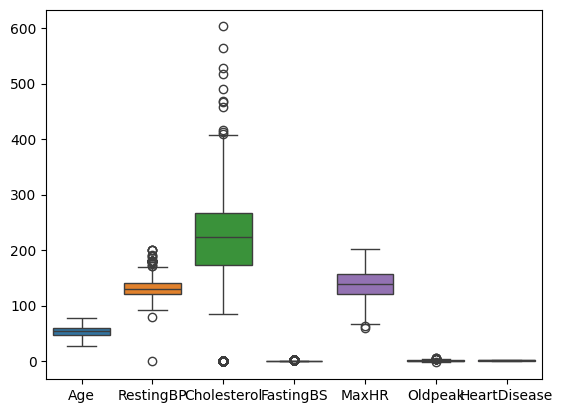

In [ ]:
sns.boxplot(data)

##### Outliers need to be handled in Cholesterol and RestingBP columns.

In [ ]:
df=data

In [ ]:
Q1=data['Cholesterol'].quantile(0.25)
Q3 = data['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(93.75)

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
data['Cholesterol']=data['Cholesterol'].apply(lambda x: min(max(x,lower_bound),upper_bound))

In [ ]:
Q1 = data['RestingBP'].quantile(0.25)
Q3 = data['RestingBP'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(20.0)

In [ ]:
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

In [ ]:
data['RestingBP']=data['RestingBP'].apply(lambda x: min(max(x,lower_bound),upper_bound))

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.125272,203.985158,0.233115,136.809368,0.887364,0.553377
std,9.432617,16.993314,95.922341,0.423046,25.460334,1.066570,0.497414
min,28.000000,90.000000,32.625000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,407.625000,1.000000,202.000000,6.200000,1.000000


##### Outliers are handled successfully.

In [ ]:
neg=(data['Oldpeak']<0).sum()
neg

np.int64(13)

##### Oldpeak has negative value to be handled.

In [ ]:
data.loc[data['Oldpeak']<0,'Oldpeak']=pd.NA
data['Oldpeak'].fillna(data['Oldpeak'].median())

0      0.0
1      1.0
2      0.0
3      1.5
4      0.0
      ... 
913    1.2
914    3.4
915    1.2
916    0.0
917    0.0
Name: Oldpeak, Length: 918, dtype: float64

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,905.000000,918.000000
mean,53.510893,132.125272,203.985158,0.233115,136.809368,0.914254,0.553377
std,9.432617,16.993314,95.922341,0.423046,25.460334,1.046944,0.497414
min,28.000000,90.000000,32.625000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,407.625000,1.000000,202.000000,6.200000,1.000000


<Axes: >

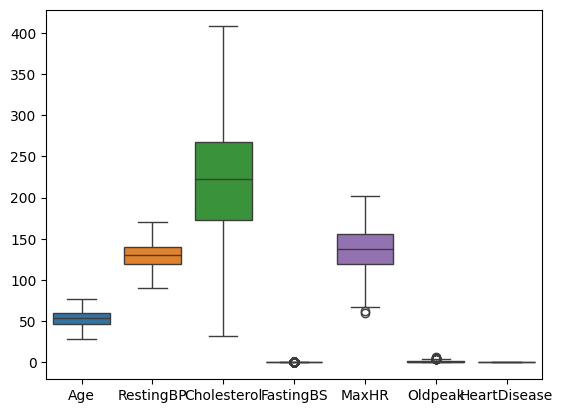

In [ ]:
sns.boxplot(data)

##### Changes seen in boxplot form.

##### Checking categorical data consistency

In [ ]:
data['Sex'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
data['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [ ]:
data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [ ]:
data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [ ]:
data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

##### Categorical data has consistency and hence no error has found to be handled.

In [ ]:
duplicates = data[data.duplicated()]
duplicates

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


##### No duplicates found in dataset.

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,905.000000,918.000000
mean,53.510893,132.125272,203.985158,0.233115,136.809368,0.914254,0.553377
std,9.432617,16.993314,95.922341,0.423046,25.460334,1.046944,0.497414
min,28.000000,90.000000,32.625000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,407.625000,1.000000,202.000000,6.200000,1.000000


<Axes: >

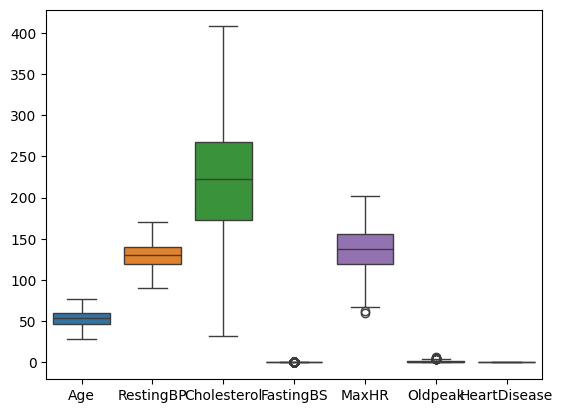

In [ ]:
sns.boxplot(data)

##### Results verified...